In [1]:
# подготовка данных и обучение модели
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# пример данных
data = pd.DataFrame({
    'user_id': [1, 2, 3, 4, 5, 6],
    'treatment': [1, 0, 1, 0, 1, 0],
    'num_trips': [10, 8, 12, 7, 9, 6],
    'avg_trip_cost': [15, 12, 14, 11, 13, 10],
    'gender': ['M', 'F', 'M', 'F', 'M', 'F'],
    'location': ['City A', 'City B', 'City A', 'City B', 'City A', 'City B'],
    'target': [5, 2, 7, 1, 4, 0]
})

# трансформация целевой переменной
data['target_transformed'] = data.apply(
    lambda row: row['target'] if row['treatment'] == 1 else -row['target'], axis=1)

# целевая переменная и признаки
y = data['target_transformed']
X = data.drop(['target', 'target_transformed', 'user_id'], axis=1)

# разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# предобработка данных
numeric_features = ['num_trips', 'avg_trip_cost']
categorical_features = ['gender', 'location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# модель
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# обучение модели
model.fit(X_train, y_train)

# оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Predictions:", y_pred)


Mean Squared Error: 1.6202
Predictions: [ 4.98 -0.2 ]


In [2]:
# применение модели ко всем данным для принятия решения о предоставлении скидок
all_data_predictions = model.predict(X)

# устанавливаем порогового значения для предоставления скидок
threshold = 1.0  # пороговое значение можно настроить

In [3]:
# определение пользователей, которым рекомендуется предоставить скидку
data['predicted_uplift'] = all_data_predictions
data['give_discount'] = data['predicted_uplift'] > threshold
# вывод пользователей, которым рекомендуется предоставить скидку
users_to_give_discount = data[data['give_discount']]

print("Users to give discount:")
print(users_to_give_discount[['user_id', 'predicted_uplift']])

Users to give discount:
   user_id  predicted_uplift
0        1              4.98
2        3              5.64
4        5              4.24


qini сбор данных 

In [4]:
import pandas as pd
import numpy as np

# генерация данных для 100 пользователей
np.random.seed(42)
n = 100
treatment = np.array([1]*50 + [0]*50)
outcome = np.concatenate([np.random.choice([1, 0], p=[0.2, 0.8], size=50),
                          np.random.choice([1, 0], p=[0.1, 0.9], size=50)])
uplift_prediction = np.random.rand(n)

# создание DataFrame
data = {
    'user_id': range(1, n+1),
    'treatment': treatment,
    'outcome': outcome,
    'uplift_prediction': uplift_prediction
}

df = pd.DataFrame(data)
print(df.head())

   user_id  treatment  outcome  uplift_prediction
0        1          1        0           0.031429
1        2          1        0           0.636410
2        3          1        0           0.314356
3        4          1        0           0.508571
4        5          1        1           0.907566


In [5]:
# сортировка данных по uplift_prediction
df = df.sort_values(by='uplift_prediction', ascending=False).reset_index(drop=True)
print(df.head())

   user_id  treatment  outcome  uplift_prediction
0       55          0        0           0.985650
1       40          1        0           0.971782
2       41          1        1           0.962447
3       35          1        0           0.942910
4       79          0        0           0.936730


In [6]:
# инициализация переменных
nt = 0
nt_1 = 0
nc = 0
nc_1 = 0
cgain = []
random = []
optimum = []
incremental_purchases = 0
opt_incremental_purchases = df['outcome'].sum()

In [7]:
# расчёт CGain, Random и Optimum
for i, row in df.iterrows():
    if row['treatment'] == 1:
        nt += 1
        if row['outcome'] == 1:
            nt_1 += 1
            incremental_purchases += 1
    else:
        nc += 1
        if row['outcome'] == 1:
            nc_1 += 1

    cgain.append(incremental_purchases)
    random.append(opt_incremental_purchases * (i + 1) / len(df))
    optimum.append(min(opt_incremental_purchases, (i + 1) * 1.0))

In [8]:
from sklearn.metrics import auc

# расчёт площади под кривыми
qini_auc = auc(range(1, len(cgain) + 1), cgain)
random_auc = auc(range(1, len(random) + 1), random)

# расчёт Qini Score
qini_score = qini_auc - random_auc

# вывод Qini Score
print(f'Qini Score: {qini_score}')

Qini Score: -264.3900000000001


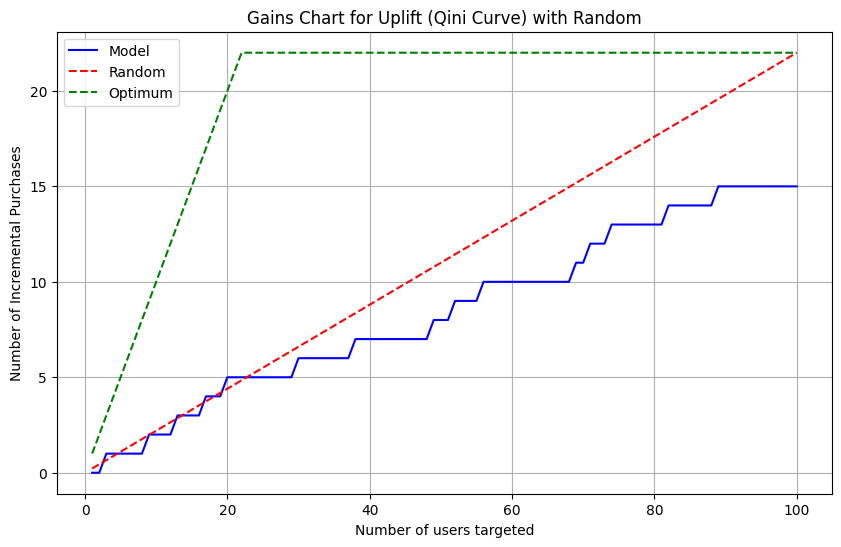

In [9]:
import matplotlib.pyplot as plt

# построение графиков
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cgain) + 1), cgain, label='Model', color='blue')
plt.plot(range(1, len(random) + 1), random, label='Random', color='red', linestyle='--')
plt.plot(range(1, len(optimum) + 1), optimum, label='Optimum', color='green', linestyle='--')
plt.xlabel('Number of users targeted')
plt.ylabel('Number of Incremental Purchases')
plt.title('Gains Chart for Uplift (Qini Curve) with Random')
plt.legend()
plt.grid(True)
plt.show()


Ниже приведён код для отрисовки Qini-кривой. Дополните его и посчитайте Qini Score

In [2]:
import pandas as pd 


dat = pd.read_csv('discountuplift.csv',sep=r'\t')

dat.head()

/tmp/ipykernel_7222/2490892768.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dat = pd.read_csv('discountuplift.csv',sep=r'\t')


,recency,history,used_discount,used_bogo,is_referral,treatment,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,proba_CN,proba_CR,proba_TN,proba_TR,uplift_score,target_class
0,3,977.51,1,1,1,0,0,0,1,0,0,1,0.476095,0.159710,0.280660,0.083534,-0.043654,0
1,4,391.10,1,0,0,0,1,0,0,1,0,0,0.443035,0.087289,0.285081,0.184594,0.456858,0
2,7,72.37,1,0,1,1,0,0,1,0,0,1,0.514386,0.015488,0.429174,0.040952,0.115756,2
3,10,67.40,1,0,0,1,0,0,1,0,0,1,0.386800,0.125233,0.415839,0.072128,-0.193534,2
4,2,45.68,1,0,1,1,0,0,1,0,1,0,0.517491,0.022507,0.412372,0.047630,0.123726,2


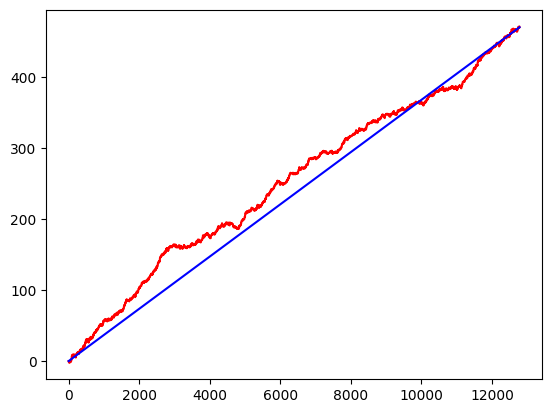

np.float64(212365.0)

In [ ]:
# загружаем необходимые библиотеки
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# загружаем DataFrame
discount = pd.read_csv("discountuplift.csv", sep="\t")

# реализуем подсчёт Qini Score:
def qini_df(df):
    # 1. Отранжируем выборку по значению uplift в порядке убывания
    ranked = discount.sort_values(by='uplift_score',ascending = False).reset_index(drop = True)
    
    N_c = sum(ranked['target_class'] <= 1)
    N_t = sum(ranked['target_class'] >= 2)
    
    # посчитаем в отсортированном датафрейме основные показатели, 
    # которые используются при расчёте Qini Score
    ranked['n_c1'] = 0
    ranked['n_t1'] = 0
    ranked.loc[ranked.target_class == 1,'n_c1'] = 1
    ranked.loc[ranked.target_class == 3,'n_t1'] = 1
    ranked['n_c1/nc'] = ranked.n_c1.cumsum() / N_c
    ranked['n_t1/nt'] = ranked.n_t1.cumsum() / N_t
    
    # посчитаем Qini-кривую и случайную прямую под ней
    ranked['uplift'] = ranked['n_t1'].cumsum() - ranked['n_c1'].cumsum() * (N_t / N_c)

    # добавим случайную кривую
    total_uplift = ranked['n_t1'].sum() - ranked['n_c1'].sum() * (N_t / N_c)
    ranked['random_uplift'] = np.linspace(0, total_uplift, len(ranked))

    ranked["n"] = ranked.index
    # немного кода для визуализации
    plt.plot(ranked['n'], ranked['uplift'], color='r')
    plt.plot(ranked['n'], ranked['random_uplift'], color='b')
    plt.show()
    
    return (ranked['uplift'] - ranked['random_uplift']).sum()

round(qini_df(discount),ndigits=5)

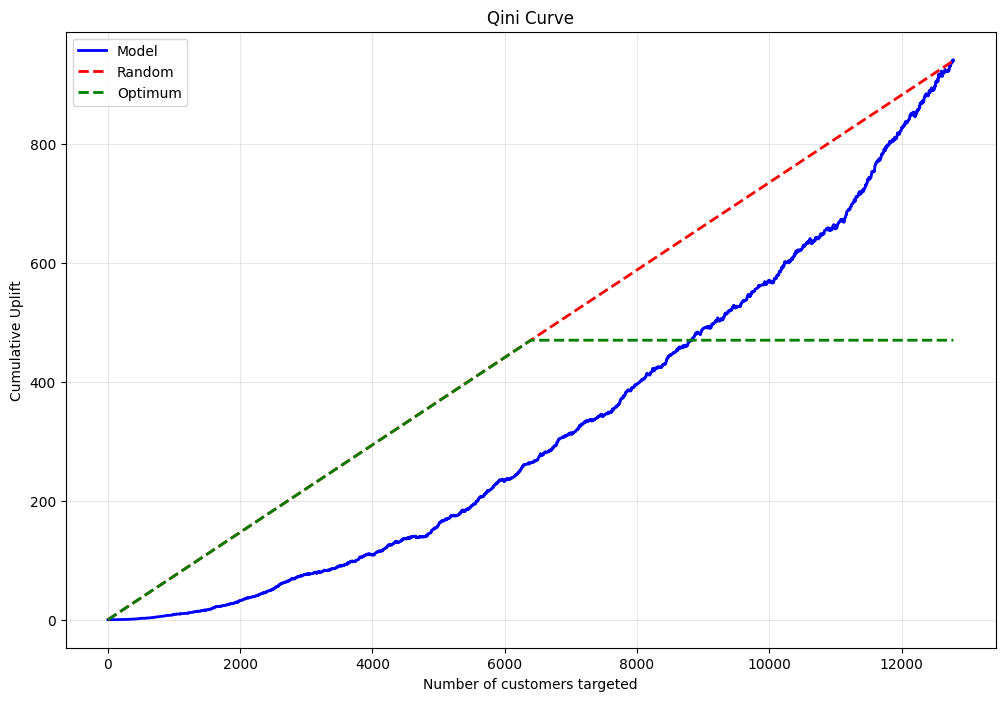

Qini Score: -1866304.5507
Model AUC: 4141235.4861
Random AUC: 6007540.0368

Статистика:
Всего наблюдений: 12784
Контрольная группа: 6392
Тестовая группа: 6392
Положительных исходов в контроле: 704
Положительных исходов в тесте: 1174


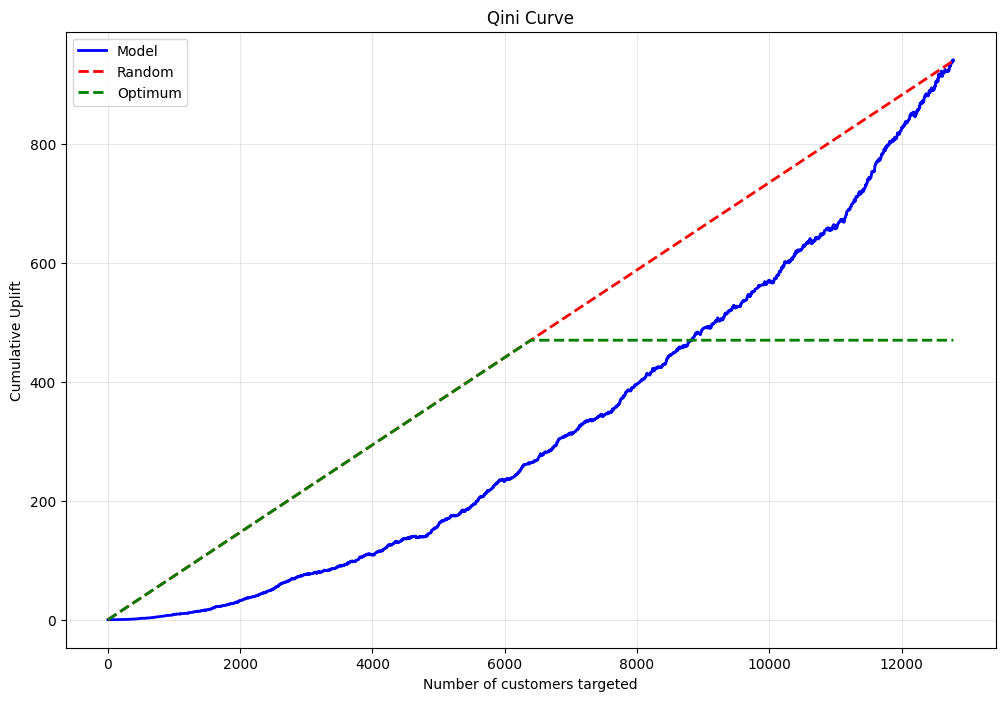

Qini Score: -1866304.5507
Model AUC: 4141235.4861
Random AUC: 6007540.0368

Статистика:
Всего наблюдений: 12784
Контрольная группа: 6392
Тестовая группа: 6392
Положительных исходов в контроле: 704
Положительных исходов в тесте: 1174


-1866304.55069

In [12]:
from qini_curve_fixed import qini_df

round(qini_df(discount),ndigits=5)

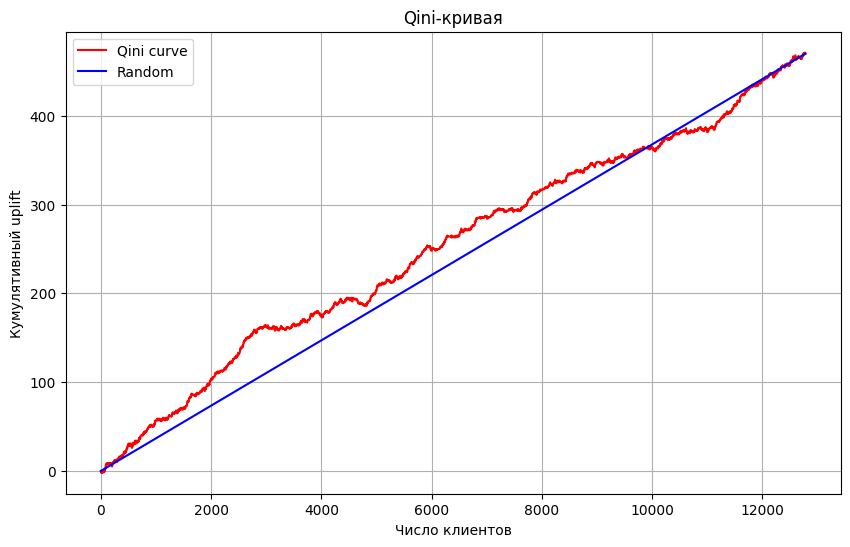

np.float64(212365.0)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def qini_curve(df, uplift_col='uplift_score', target_col='target_class'):
    # 1. Сортировка по uplift_score
    df = df.sort_values(by=uplift_col, ascending=False).reset_index(drop=True)

    # 2. Флаги по откликам
    df['treatment'] = df[target_col].isin([2, 3]).astype(int)
    df['response'] = df[target_col].isin([1, 3]).astype(int)
    df['treated_response'] = ((df['treatment'] == 1) & (df['response'] == 1)).astype(int)
    df['control_response'] = ((df['treatment'] == 0) & (df['response'] == 1)).astype(int)

    # 3. Подсчёты
    N_t = df['treatment'].sum()
    N_c = len(df) - N_t

    cum_tr = df['treated_response'].cumsum()
    cum_cr = df['control_response'].cumsum()

    qini = cum_tr - cum_cr * (N_t / N_c)

    # 4. Случайная линия
    random_qini = np.linspace(0, qini.iloc[-1], len(df))

    # 5. Построение
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(df)), qini, label='Qini curve', color='red')
    plt.plot(range(len(df)), random_qini, label='Random', color='blue')
    plt.xlabel('Число клиентов')
    plt.ylabel('Кумулятивный uplift')
    plt.legend()
    plt.title('Qini-кривая')
    plt.grid(True)
    plt.show()

    # Qini score
    return (qini - random_qini).sum()


round(qini_curve(dat),ndigits=5)